# Pyroom Acoustics white noise

In [27]:
import pyroomacoustics as pra
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import os

In [34]:
# Create anechoic room.
sample_rate = 48_000
room = pra.AnechoicRoom(fs=sample_rate, air_absorption=True, temperature=20.0, humidity=50.0)

# Place the microphone array around the origin.
mic_locs = np.c_[
    [0.0, 0.0, 1.0],
]
room.add_microphone_array(mic_locs)

# Add a source. We use a white noise signal for the source, and
# the source can be arbitrarily far because there are no walls.
amplitude = 1.0
duration = 7.0
x = np.random.uniform(-amplitude, amplitude, int(duration * sample_rate))
room.add_source([343.0, 0.0, 1.0], signal=x)

# run the simulation
room.simulate()

os.makedirs("_tmp", exist_ok=True)
room.mic_array.to_wav("_tmp/pra_whitenoise_static.wav")

0.001967085


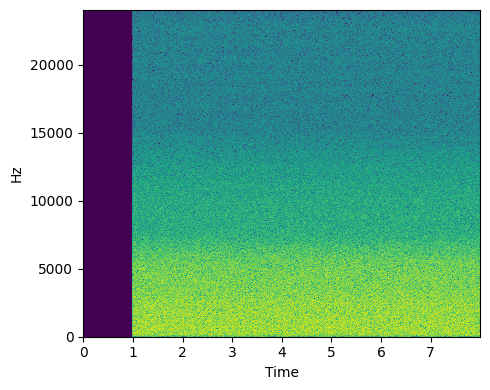

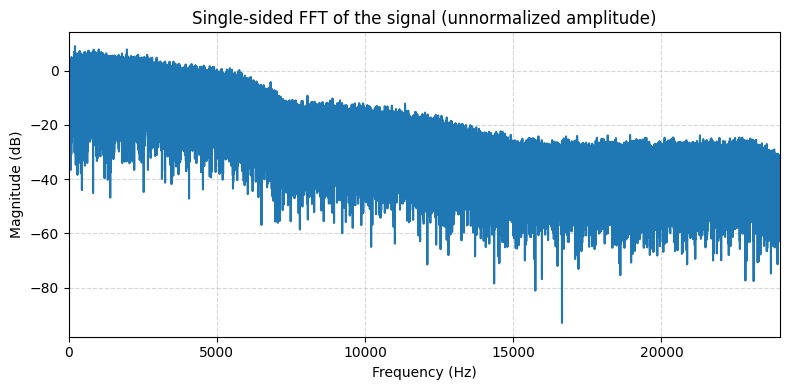

In [35]:
signal, sr = librosa.load("_tmp/pra_whitenoise_static.wav", sr=None, mono=False)

if signal.ndim == 1:  # if single channel reshape to a common format (n_channels, n_samples)
    signal = signal.reshape(1, -1)

print(max(signal[0]))
ipd.display(ipd.Audio(signal[0], rate=sr))

D = librosa.stft(signal[0])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(5, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='fft', cmap='viridis')#, vmin=-30, vmax=-0)
#plt.ylim(0, 4000)
# plt.colorbar(format='%+2.0f dB')
#plt.title('Spectrogram')
plt.tight_layout()
plt.show()

# --- FFT ---
X = np.fft.rfft(signal[0])
N = len(signal[0])
freq = np.fft.rfftfreq(N, d=1/sr)

# magnitude to dB
mag = np.abs(X)
mag_db = 20 * np.log10(mag)

plt.figure(figsize=(8, 4))
plt.plot(freq, mag_db, color='C0')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Single-sided FFT of the signal (unnormalized amplitude)')
plt.xlim(0, sr / 2)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

# PyroadAcoustics white noise

In [13]:
import pyroadacoustics as pyroad

import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
from scipy.io import wavfile
import os
import IPython.display as ipd
import struct

In [14]:
# Sampling Frequency
fs = 48_000

# Atmospheric Parameters
T = 20
p = 1
h_rel = 50

env = pyroad.Environment(fs = fs, temperature = T, pressure = p, rel_humidity = h_rel)

# Define source signal
t = np.arange(0,8,1/fs)
  
# 2. White noise signal
amplitude = 1.0
src_signal = np.random.uniform(-amplitude, amplitude, len(t))

env.add_source(position = np.array([343, 0, 1]), signal=src_signal)

# Add microphone array
mic_array = np.array([[0,0,1], ])
env.add_microphone_array(mic_array)

interp_method = "Sinc"#  "Linear" "Allpass" "Sinc"
include_reflection = False
include_air_absorption = True

env.set_simulation_params(interp_method, include_reflection, include_air_absorption)

# Run simulation 
signal = env.simulate()

# Save Audio File
os.makedirs("_tmp", exist_ok=True)
interleaved = (np.clip(signal, -1.0, 1.0) * np.iinfo(np.int32).max).astype(np.int32).reshape(-1)
wavfile.write('_tmp/pyroad_whitenoise_static.wav', fs, interleaved) # int32 (little-endian)

0.0011900887


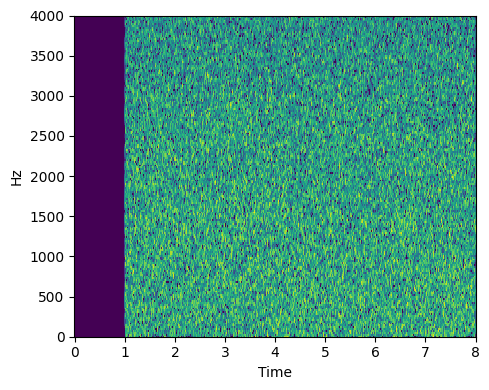

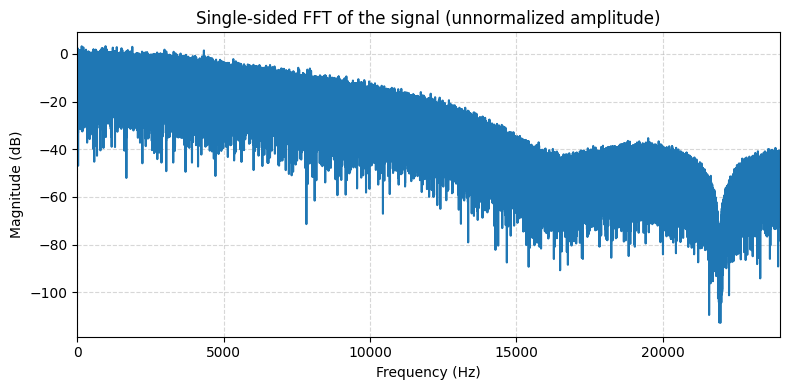

In [25]:
signal, sr = librosa.load("_tmp/pyroad_whitenoise_static.wav", sr=None, mono=False)

if signal.ndim == 1:  # if single channel reshape to a common format (n_channels, n_samples)
    signal = signal.reshape(1, -1)

print(max(signal[0]))
ipd.display(ipd.Audio(signal[0], rate=sr))

D = librosa.stft(signal[0])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(5, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='fft', cmap='viridis', vmin=-30, vmax=-0)
plt.ylim(0, 4000)
# plt.colorbar(format='%+2.0f dB')
#plt.title('Spectrogram')
plt.tight_layout()
plt.show()

# --- FFT ---
X = np.fft.rfft(signal[0])
N = len(signal[0])
freq = np.fft.rfftfreq(N, d=1/sr)

# magnitude to dB
mag = np.abs(X)
mag_db = 20 * np.log10(mag)

plt.figure(figsize=(8, 4))
plt.plot(freq, mag_db, color='C0')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Single-sided FFT of the signal (unnormalized amplitude)')
plt.xlim(0, sr / 2)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

# DynamicSound white noise

In [1]:
import os
import dynamic_sound as ds
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import numpy as np
import pyroomacoustics as pra

In [2]:
source_path = ds.Path([
    [0.0,  343, 0, 1,   1, 0, 0, 0],
    [7.0,  343, 0, 1,   1, 0, 0, 0]
])
microphone_path = ds.Path([
    [0.0,  0, 0, 1,   1, 0, 0, 0],
    [7.0,  0, 0, 1,   1, 0, 0, 0]
])

# simulation environment
sim = ds.Simulation(
    temperature=20,
    pressure=1,
    relative_humidity=50
)

# microphone
mic_sample_rate = 48_000
microphone = ds.microphones.Microphone("_tmp/dynamicsound_whitenoise_static.wav", sample_rate=mic_sample_rate)
sim.add_microphone(path=microphone_path, microphone=microphone)

# source
source = ds.sources.WhiteNoise(duration=10.0, sample_rate=48_000, amplitude=1.0)
sim.add_source(
    path=source_path,
    source=source
)

sim.run()

 14%|█▍        | 47916/336000 [00:22<03:12, 1498.02it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 14%|█▍        | 48071/336000 [00:23<04:45, 1007.16it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 14%|█▍        | 48196/336000 [00:23<06:18, 760.01it/s] 

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 14%|█▍        | 48297/336000 [00:23<07:19, 654.29it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 14%|█▍        | 48381/336000 [00:23<07:51, 610.16it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 14%|█▍        | 48454/336000 [00:24<10:31, 455.13it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 14%|█▍        | 48512/336000 [00:24<10:52, 440.49it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 14%|█▍        | 48614/336000 [00:24<10:56, 437.43it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 14%|█▍        | 48709/336000 [00:24<10:46, 444.11it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 15%|█▍        | 48804/336000 [00:24<10:33, 453.68it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

 15%|█▍        | 48928/336000 [00:25<02:27, 1944.05it/s]

[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.60269819e-01 7.53358894e-01 6.17261599e-01
 4.69195796e-01 3.30864712e-01 2.16751049e-01 1.32171842e-01
 7.51974392e-02 4.00227016e-02 1.99854419e-02 9.39254921e-03
 4.16821671e-03 1.75270357e-03 7.00802343e-04 2.67409302e-04
 9.77302163e-05 3.43343245e-05 1.16368871e-05 3.81846536e-06
 1.21725861e-06 3.78243199e-07 1.14934979e-07 3.42581934e-08
 1.00457129e-08 2.90606085e-09 8.31510379e-10 2.35899569e-10
 6.65067732e-11 1.86720473e-11 5.23045575e-12 1.46443603e-12]
[1.00000000e+00 8.6026

KeyboardInterrupt: 

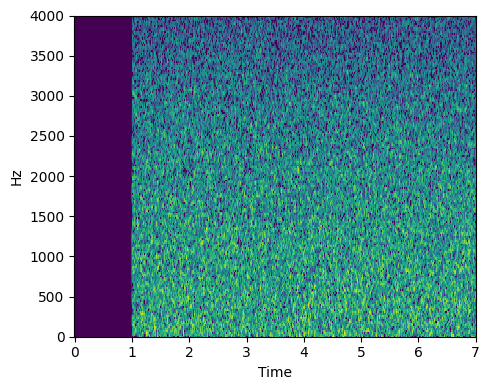

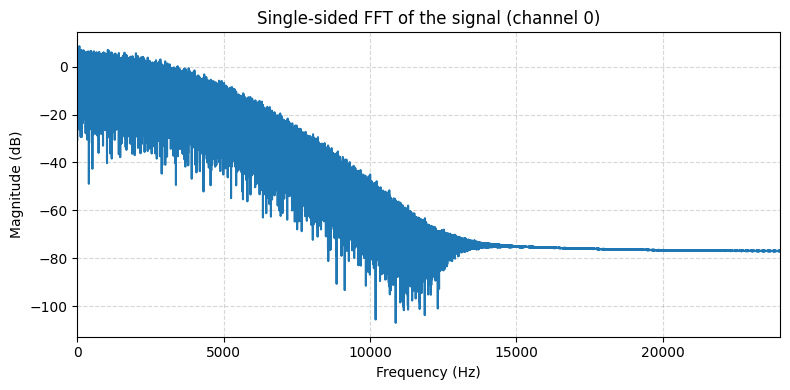

In [ ]:
signal, sr = librosa.load("_tmp/dynamicsound_whitenoise_static.wav", sr=None, mono=False)

if signal.ndim == 1:  # if single channel reshape to a common format (n_channels, n_samples)
    signal = signal.reshape(1, -1)
    
ipd.display(ipd.Audio(signal[0], rate=sr))

D = librosa.stft(signal[0])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(5, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='fft', cmap='viridis', vmin=-30, vmax=-0)
plt.ylim(0, 4000)
# plt.colorbar(format='%+2.0f dB')
#plt.title('Spectrogram')
plt.tight_layout()
plt.show()

# --- FFT ---
X = np.fft.rfft(signal[0])
N = len(signal[0])
freq = np.fft.rfftfreq(N, d=1/sr)

mag = np.abs(X)
mag_db = 20 * np.log10(mag)

plt.figure(figsize=(8, 4))
plt.plot(freq, mag_db, color='C0')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Single-sided FFT of the signal (channel 0)')
plt.xlim(0, sr / 2)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


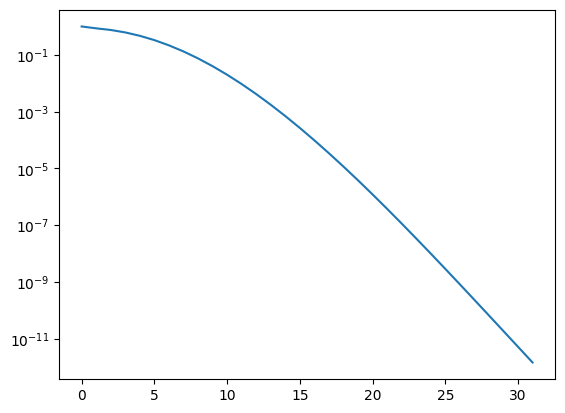

In [ ]:
coeff = [1.00000000e+00, 8.60269819e-01, 7.53358894e-01, 6.17261599e-01,
 4.69195796e-01, 3.30864712e-01, 2.16751049e-01, 1.32171842e-01,
 7.51974392e-02, 4.00227016e-02, 1.99854419e-02, 9.39254921e-03,
 4.16821671e-03, 1.75270357e-03, 7.00802343e-04, 2.67409302e-04,
 9.77302163e-05, 3.43343245e-05, 1.16368871e-05, 3.81846536e-06,
 1.21725861e-06, 3.78243199e-07, 1.14934979e-07, 3.42581934e-08,
 1.00457129e-08, 2.90606085e-09, 8.31510379e-10, 2.35899569e-10,
 6.65067732e-11, 1.86720473e-11, 5.23045575e-12, 1.46443603e-12]

plt.plot(coeff)
plt.yscale('log')
plt.show()